In [1]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
cols = list(df.columns)

# Get the column indices of the first and fifth columns
first_col_idx = cols.index('Léger to Puissant')
fifth_col_idx = cols.index('Cépages')

# Swap the column indices
cols[first_col_idx], cols[fifth_col_idx] = cols[fifth_col_idx], cols[first_col_idx]

# Assign the new order of columns to the DataFrame
df = df[cols]
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Cépages,Souple to Tannique,Sec to Moelleux,Doux to Acide,Léger to Puissant,acacia,amande amère,aneth,anis,anis étoilé,...,vanille.1,violette.1,végétal.1,zeste d'agrume,zeste d'orange,zeste de lime,épices.1,épices de boulangerie.1,épicé,évolution (vieillissement)
0,Cabernet-Sauvignon,54.000871,35.730447,49.651155,81.506206,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Cabernet-Sauvignon,62.006638,41.037754,54.328795,80.189503,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Cabernet-Sauvignon,50.110101,31.002883,54.353158,83.372641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cabernet-Sauvignon,53.311266,25.018468,65.731435,79.226506,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cabernet-Sauvignon,53.002333,23.593521,57.636678,79.351619,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:39: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


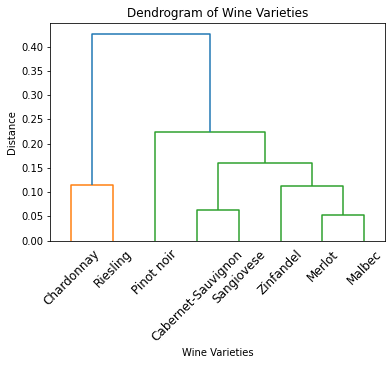

In [10]:
df = pd.read_csv("data.csv")
cols = list(df.columns)

# Get the column indices of the first and fifth columns
first_col_idx = cols.index('Léger to Puissant')
fifth_col_idx = cols.index('Cépages')

# Swap the column indices
cols[first_col_idx], cols[fifth_col_idx] = cols[fifth_col_idx], cols[first_col_idx]

# Assign the new order of columns to the DataFrame
df = df[cols]
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['Cépages'])
varieties = df['Cépages'].unique()
variety_data = {v: df[df['Cépages']==v] for v in varieties}
from scipy.spatial.distance import pdist, squareform

# Compute the mean values for each variable for each variety
means = pd.DataFrame(columns=df.columns[1:])
for v, data in variety_data.items():
    means.loc[v] = np.concatenate([
        data.select_dtypes(include=np.number).mean().values,
        (data.select_dtypes(include=bool).sum()/len(data)).values
    ])
means = means.fillna(0)
# Specify the distance metric to use
metric = 'cosine'

# Compute pairwise distances between varieties using the specified metric
distances = squareform(pdist(means, metric=metric))
distances_df = pd.DataFrame(distances, index=means.index, columns=means.index)
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# calculate the linkage matrix using complete linkage
linkage_matrix = linkage(distances_df, method='complete')

# plot the dendrogram

dendrogram(linkage_matrix, labels=distances_df.columns)
plt.title('Dendrogram of Wine Varieties')
plt.xlabel('Wine Varieties')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()